In [1]:
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.naive_bayes import GaussianNB  

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("NEW_Water_Quality.csv",index_col=0)
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [3]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


#### Feature distubution before doing feature scaling

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

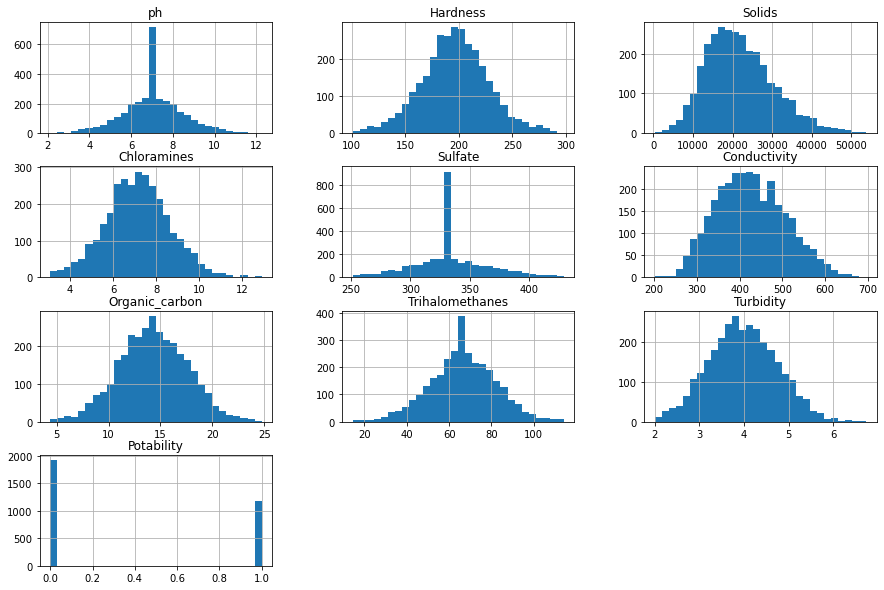

In [4]:
data.hist(bins=30, figsize=(15, 10))


(array([[3098.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [3098.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [  29.,  191.,  628.,  784.,  667.,  425.,  222.,  101.,   39.,
           12.],
        [3098.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [3098.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [3098.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [3098.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [3098.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [3098.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [3098.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]]),
 array([    0.        ,  5373.58991939, 10747.17983877, 16120.76975816,
        21494.35967755, 26867.949596

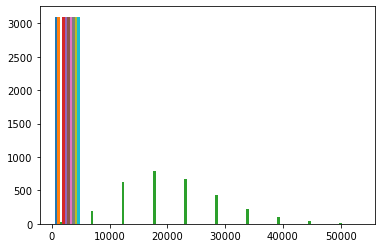

In [5]:
plt.hist(data)

### Implementing Normalization technique since distrubution is not gaussian
#### Normalization of data is a type of Feature scaling and is only required when the data distribution is unknown or the data doesn't have Gaussian Distribution. 

#### Normalization scales in a range of [0,1] or [-1,1].

### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

### MinMaxScaler
#### There is another way of data scaling, where the minimum of feature is made equal to zero and the maximum of feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(data)
data_scaled = scaler.transform(data)
data_scaled=pd.DataFrame(data_scaled)
data_scaled
X_train, X_test, y_train, y_test = train_test_split(data.drop('Potability', axis=1),
                                                    data['Potability'],
                                                    test_size=0.3,
                                                    random_state=0)
X_strain, X_stest, y_strain, y_stest = train_test_split(data_scaled.iloc[:, :-1],
                                                    data_scaled.iloc[:,-1],
                                                    test_size=0.3,
                                                  random_state=0)
            

data_scaled

,0,1,2,3,4,5,6,7,8,9
0,0.489432,0.527562,0.383233,0.429554,0.657079,0.734560,0.294743,0.727456,0.202539,0.0
1,0.156897,0.145046,0.342771,0.361961,0.462727,0.792437,0.530239,0.420425,0.527263,0.0
2,0.590073,0.625619,0.366725,0.630377,0.462727,0.439466,0.613081,0.521471,0.222138,0.0
3,0.611583,0.575628,0.406206,0.506717,0.592015,0.327386,0.690001,0.861143,0.554320,0.0
4,0.688221,0.406985,0.330582,0.352951,0.330477,0.398564,0.352559,0.176786,0.437380,0.0
...,...,...,...,...,...,...,...,...,...,...
3093,0.250985,0.470750,0.884772,0.415976,0.609147,0.657832,0.467168,0.524150,0.513569,1.0
3094,0.561386,0.470098,0.318429,0.506923,0.462727,0.386491,0.761956,0.521232,0.167714,1.0
3095,0.720567,0.379925,0.614709,0.434638,0.462727,0.466684,0.327087,0.555770,0.273447,1.0
3096,0.296315,0.657894,0.218346,0.328226,0.462727,0.407622,0.333458,0.632301,0.571193,1.0


In [7]:
# from sklearn.preprocessing import StandardScaler
# object= StandardScaler()

# data_scaled = object.fit_transform(data)
# data_scaled=pd.DataFrame(data_scaled)
# data_scaled
# X_train, X_test, y_train, y_test = train_test_split(data.drop('Potability', axis=1),
#                                                     data['Potability'],
#                                                     test_size=0.3,
#                                                     random_state=0)
# X_strain, X_stest, y_strain, y_stest = train_test_split(data_scaled.iloc[:, :-1],
#                                                     data_scaled.iloc[:,-1],
#                                                     test_size=0.3,
#                                                   random_state=0)
            
# y_strain

In [8]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


#### Feature distubution after doing feature scaling

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

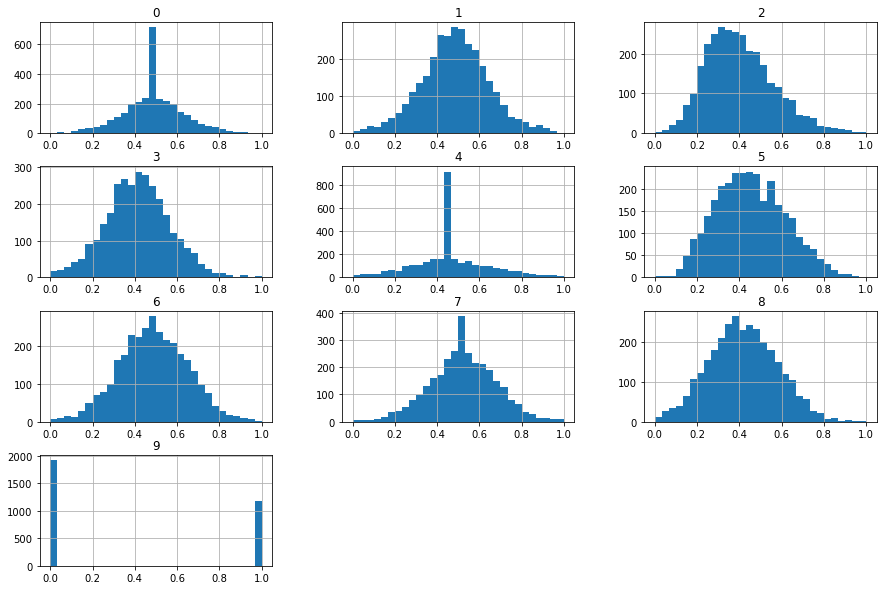

In [9]:
data_scaled.hist(bins=30, figsize=(15, 10))


In [ ]:

    run=1
    while(run):
        print("\nNaive Bayes Classifier : ")
        print("1.Feature Engineered data '\n5.Non Feature Engineered data\n3.Exit\n\n")
        m=int(input("Choose : "))
        if(m==1):
                 
                model = GaussianNB()  
                model.fit(X_strain,y_strain) 
                print("Confusion Matrix :")
                print(confusion_matrix(y_stest, model.predict(X_stest)))
                print("Accuracy: ",model.score(X_stest,y_stest)*100)
                #break
        elif(m==2):
                model = GaussianNB()  
                model.fit(X_train,y_train)  
                print("Confusion Matrix :")
                print(confusion_matrix(y_test, model.predict(X_test)))
                print("Accuracy: ",model.score(X_test,y_test)*100)
            
        else:
            run=0


Naive Bayes Classifier : 
1.Feature Engineered data '
5.Non Feature Engineered data
3.Exit


Choose : 2
Confusion Matrix :
[[526  47]
 [310  47]]
Accuracy:  61.61290322580645

Naive Bayes Classifier : 
1.Feature Engineered data '
5.Non Feature Engineered data
3.Exit


Choose : 1
Confusion Matrix :
[[526  47]
 [309  48]]
Accuracy:  61.72043010752688

Naive Bayes Classifier : 
1.Feature Engineered data '
5.Non Feature Engineered data
3.Exit


